## Séries Temporais

### Complete guide to Time Series Forecasting (with Codes in Python)
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

### How to Check if Time Series Data is Stationary with Python
- https://machinelearningmastery.com/time-series-data-stationary-python/

### How to Create an ARIMA Model for Time Series Forecasting in Python
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Time Series Forecasting - ARIMA models - Towards Data Science
- https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

### ARIMA Model – Complete Guide to Time Series Forecasting in Python
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [94]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt

In [95]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [102]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

data = data.dropna()
#data = data['2015-01':'2015-12']
#data = data['2013-01':'2014-12']
#data = data['2013-01':'2015-12']
data['temperature'] += 273.15

print("Data Types:\n", data.dtypes)
print("\nIndex:\n", data.index)
data.head()

Data Types:
 temperature    float64
dtype: object

Index:
 DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-06', '2012-10-07', '2012-10-08',
               '2012-10-09', '2012-10-10',
               ...
               '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
               '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
               '2016-11-15', '2016-11-16'],
              dtype='datetime64[ns]', name='date', length=1507, freq=None)


,temperature
date,
2012-10-01,284.186840
2012-10-02,287.490558
2012-10-03,287.668382
2012-10-04,289.970351
2012-10-05,290.098431


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1507 entries, 2012-10-01 to 2016-11-16
Data columns (total 1 columns):
temperature    1507 non-null float64
dtypes: float64(1)
memory usage: 23.5 KB


In [104]:
data.describe()

,temperature
count,1507.000000
mean,285.835589
std,11.516132
min,252.581320
25%,277.099332
50%,286.815819
75%,295.354917
max,308.888109


In [105]:
ts = data['temperature']

ts.head()

date
2012-10-01    284.186840
2012-10-02    287.490558
2012-10-03    287.668382
2012-10-04    289.970351
2012-10-05    290.098431
Name: temperature, dtype: float64

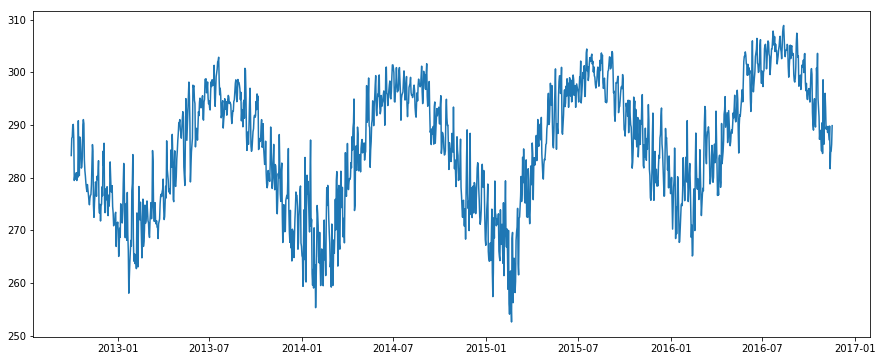

In [106]:
plt.plot(ts)

In [107]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

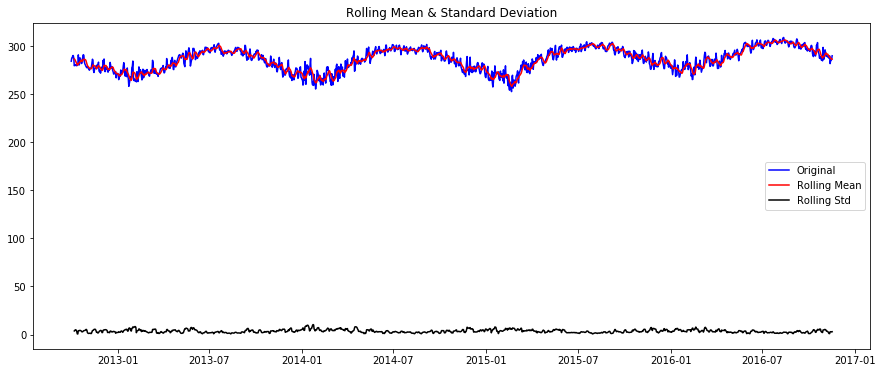

Results of Dickey-Fuller Test:
Test Statistic                   -1.859312
p-value                           0.351437
#Lags Used                       15.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64


In [108]:
test_stationarity(ts)

In [109]:
# Estimating & Eliminating Trend
ts_log = np.log(ts)
ts_log.head()

date
2012-10-01    5.649632
2012-10-02    5.661190
2012-10-03    5.661808
2012-10-04    5.669779
2012-10-05    5.670220
Name: temperature, dtype: float64

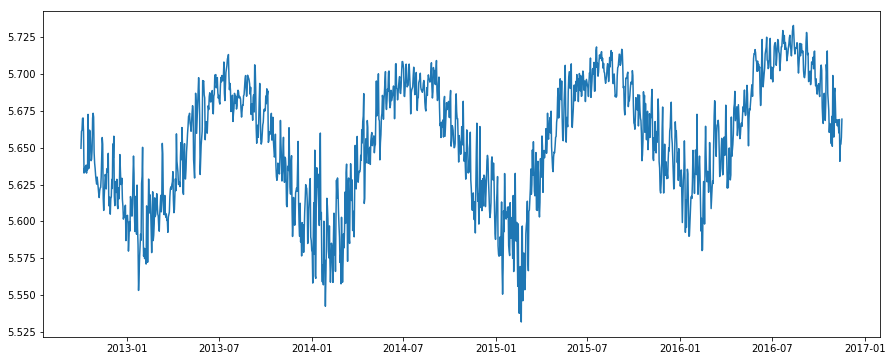

In [110]:
plt.plot(ts_log)

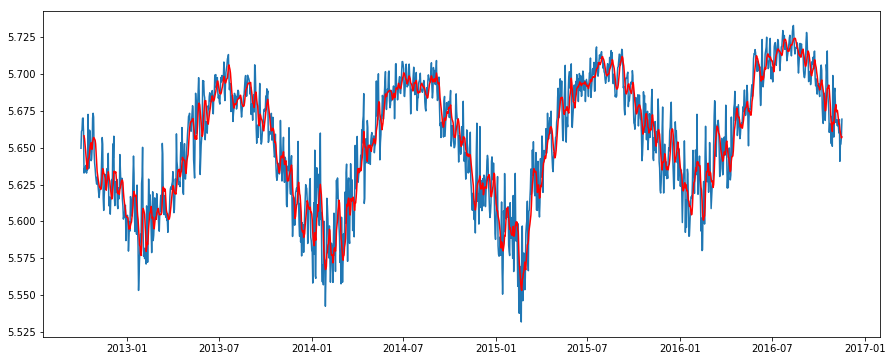

In [111]:
# Moving average
moving_avg = ts_log.rolling(7).mean()
#moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [112]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

date
2012-10-01         NaN
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-06         NaN
2012-10-07   -0.025294
2012-10-08   -0.020127
2012-10-09   -0.015893
2012-10-10   -0.014934
Name: temperature, dtype: float64

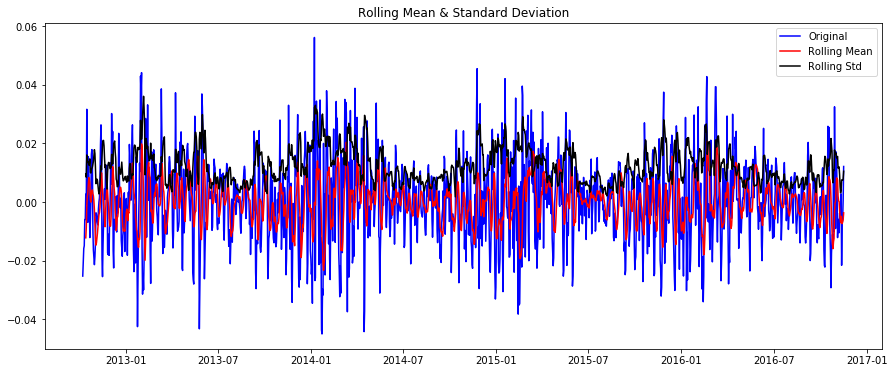

Results of Dickey-Fuller Test:
Test Statistic                   -1.859312
p-value                           0.351437
#Lags Used                       15.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64


In [113]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

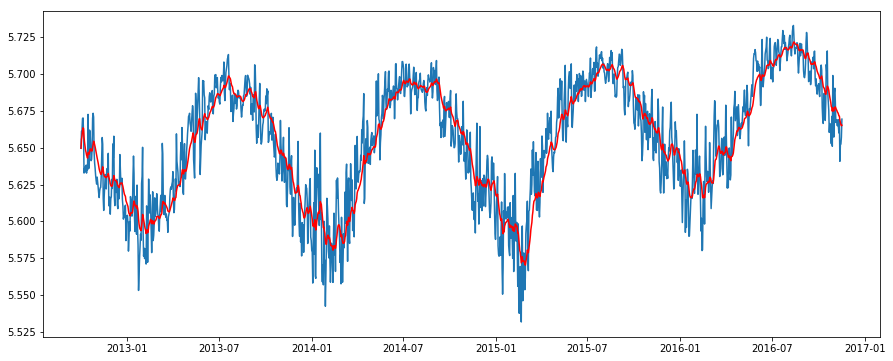

In [114]:
# exponentially weighted moving average (EWMA)

expwighted_avg = ts_log.to_frame().ewm(halflife=7).mean()
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = expwighted_avg['temperature']

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

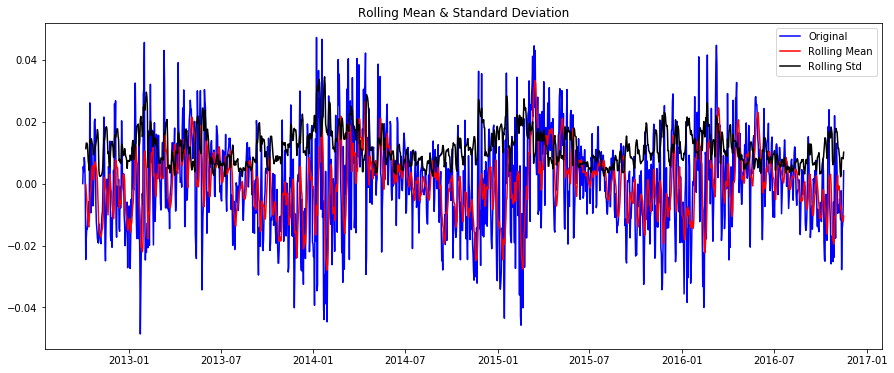

Results of Dickey-Fuller Test:
Test Statistic                   -1.859312
p-value                           0.351437
#Lags Used                       15.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64


In [115]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing

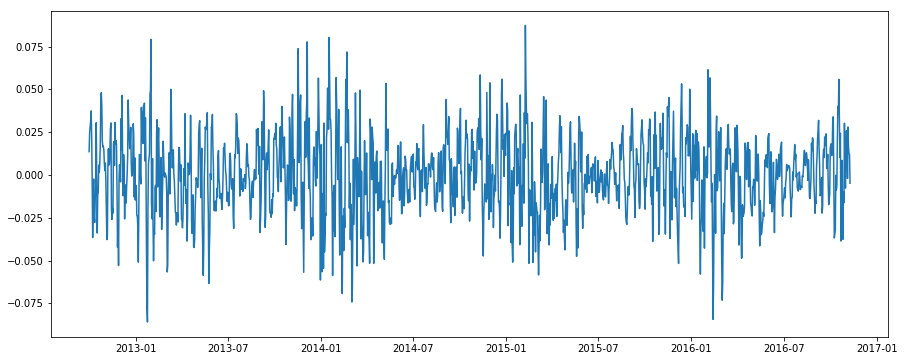

In [116]:
ts_log_diff = ts_log - ts_log.shift(-7)
#ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

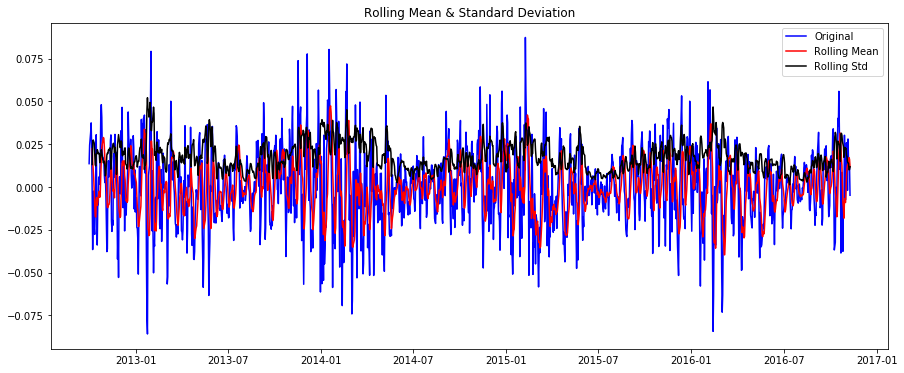

Results of Dickey-Fuller Test:
Test Statistic                   -1.859312
p-value                           0.351437
#Lags Used                       15.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64


In [117]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing

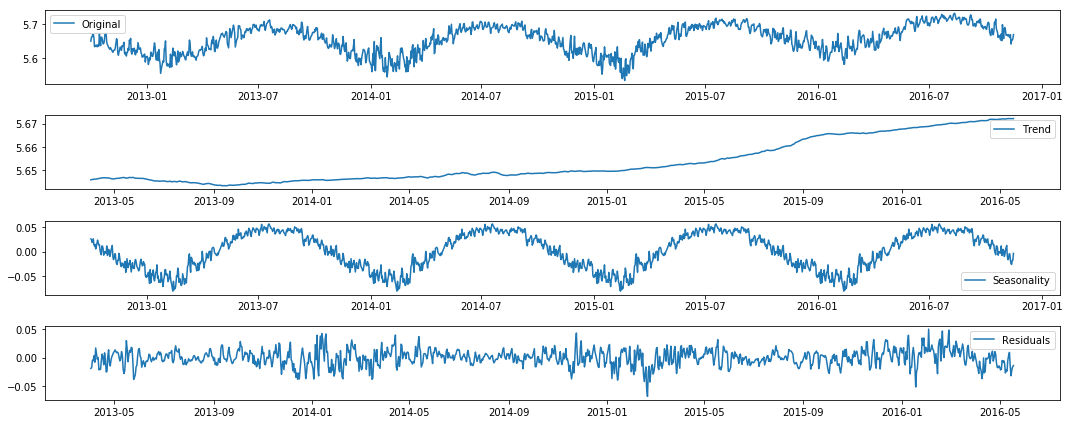

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log.dropna(), freq=365)
#decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

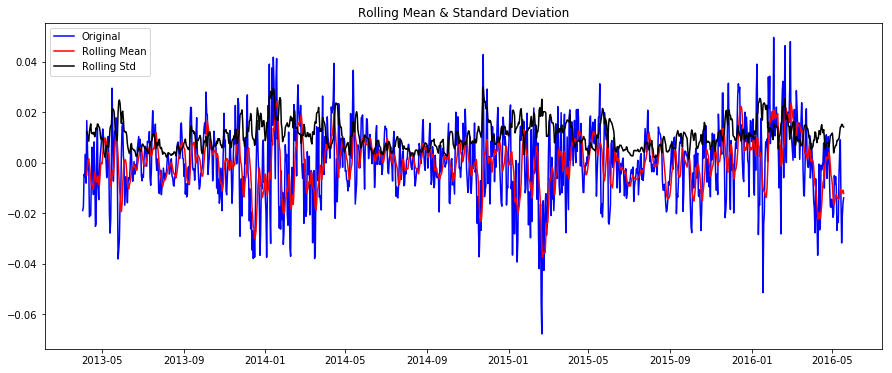

Results of Dickey-Fuller Test:
Test Statistic                   -1.859312
p-value                           0.351437
#Lags Used                       15.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64


In [119]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Forecasting a Time Series

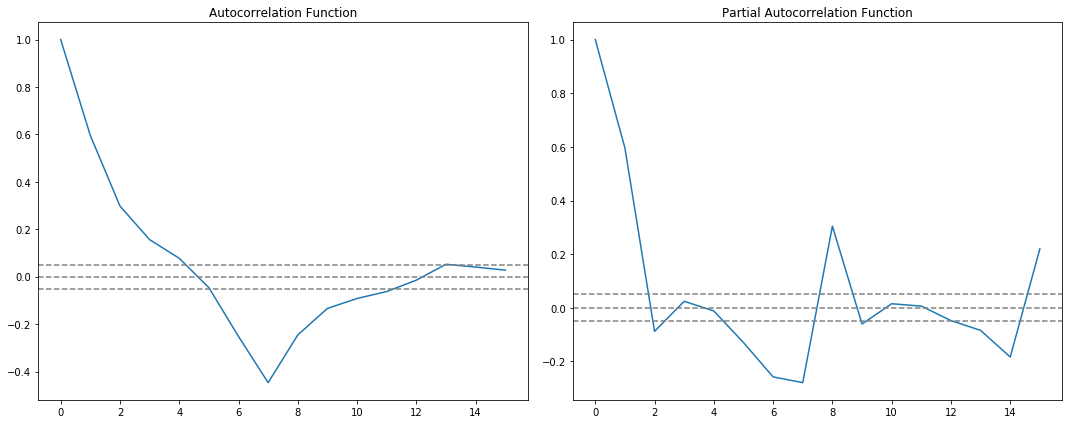

In [120]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=15)
lag_pacf = pacf(ts_log_diff, nlags=15, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

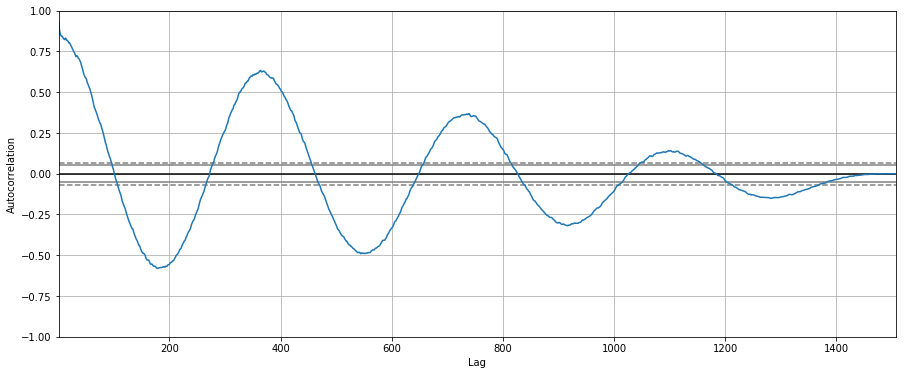

In [121]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_log)

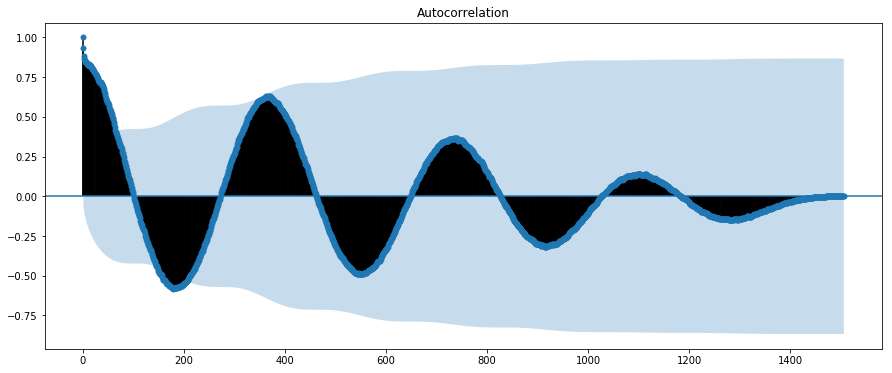

In [122]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_log)
pyplot.show()

In [123]:
# load the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

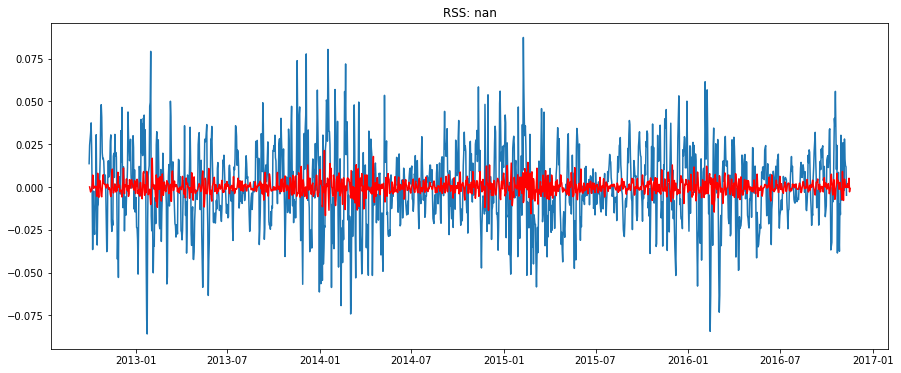

In [136]:
# AR Model
model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - ts_log_diff) ** 2))

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

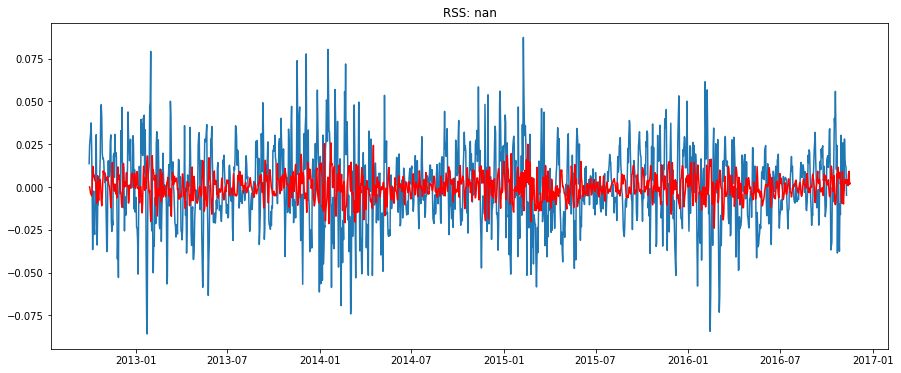

In [137]:
# MA Model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - ts_log_diff) ** 2))

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

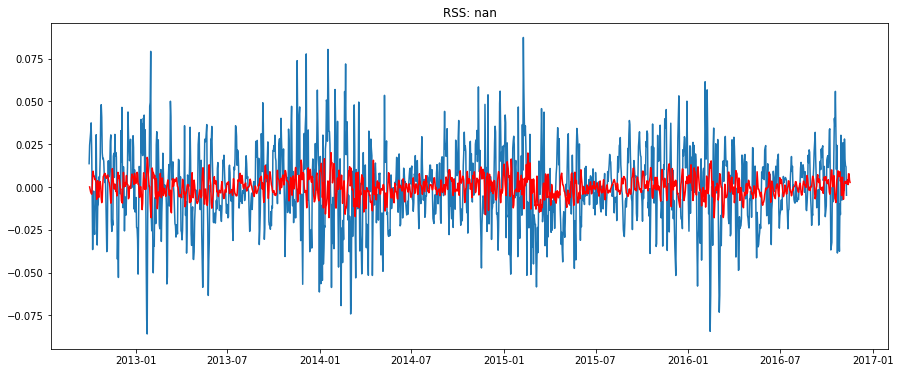

In [138]:
# Combined Model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - ts_log_diff) ** 2))

In [139]:
# Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2012-10-02    0.000008
2012-10-03   -0.001527
2012-10-04   -0.002895
2012-10-05   -0.003641
2012-10-06   -0.004209
dtype: float64

In [140]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2012-10-02    0.000008
2012-10-03   -0.001519
2012-10-04   -0.004414
2012-10-05   -0.008054
2012-10-06   -0.012264
dtype: float64

In [141]:
ts_log.head()

date
2012-10-01    5.649632
2012-10-02    5.661190
2012-10-03    5.661808
2012-10-04    5.669779
2012-10-05    5.670220
Name: temperature, dtype: float64

In [142]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2012-10-01    5.649632
2012-10-02    5.649640
2012-10-03    5.648113
2012-10-04    5.645218
2012-10-05    5.641577
dtype: float64

Text(0.5, 1.0, 'RMSE: 40.5470')

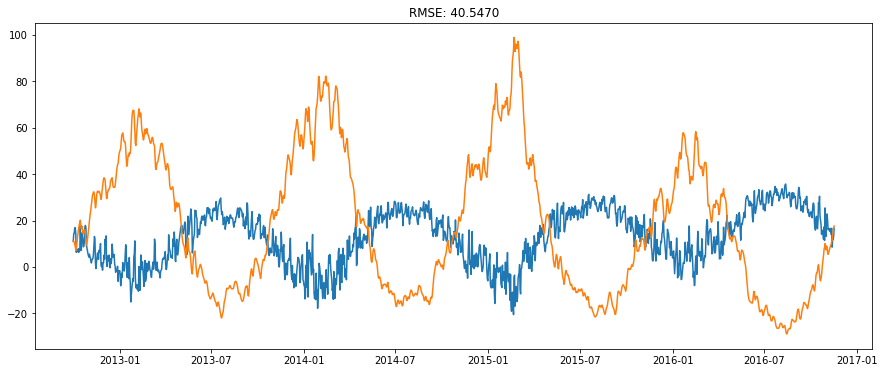

In [143]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts - 273.15)
plt.plot(predictions_ARIMA - 273.15)
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA - ts) ** 2) / len(ts)))

In [11]:
test_dates = pd.date_range(start='2016-11-17', end='2017-11-29', freq='D')
test_dates

DatetimeIndex(['2016-11-17', '2016-11-18', '2016-11-19', '2016-11-20',
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26',
               ...
               '2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23',
               '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27',
               '2017-11-28', '2017-11-29'],
              dtype='datetime64[ns]', length=378, freq='D')

In [12]:
test_data = pd.DataFrame(test_dates, columns=['ds'])
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 1 columns):
ds    378 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


,ds
0,2016-11-17
1,2016-11-18
2,2016-11-19
3,2016-11-20
4,2016-11-21


In [13]:
forecast = model.predict(test_data)
forecast[['ds', 'yhat']].tail()

,ds,yhat
373,2017-11-25,16.198291
374,2017-11-26,15.890747
375,2017-11-27,16.056617
376,2017-11-28,16.015803
377,2017-11-29,15.621383


In [17]:
submission = pd.DataFrame({
    'date': forecast['ds'],
    'temperature': forecast['yhat']
})
submission.set_index('date', inplace=True)
submission.info()
submission.head()
submission.to_csv('weather-submission.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 2016-11-17 to 2017-11-29
Data columns (total 1 columns):
temperature    378 non-null float64
dtypes: float64(1)
memory usage: 5.9 KB


In [16]:
data2.shape

(1508, 2)

In [17]:
divisao = int(data2.shape[0] * 4 / 5)

data2a = data2[:divisao]
data2b = data2[divisao:]

In [20]:
data2a.info()
data2a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 2 columns):
ds    1206 non-null datetime64[ns]
y     1205 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


,ds,y
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431


In [22]:
model = Prophet(daily_seasonality=False)
model.fit(data2a)

In [29]:
future = data2b.drop(['y'], axis=1)
future.info()
future.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1206 to 1507
Data columns (total 1 columns):
ds    302 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


,ds
1206,2016-01-20
1207,2016-01-21
1208,2016-01-22
1209,2016-01-23
1210,2016-01-24


In [26]:
future = model.make_future_dataframe(periods=365)
future.info()
future.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 1 columns):
ds    1571 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.3 KB


,ds
0,2012-10-01
1,2012-10-02
2,2012-10-03
3,2012-10-04
4,2012-10-05


In [30]:
forecast = model.predict(future)

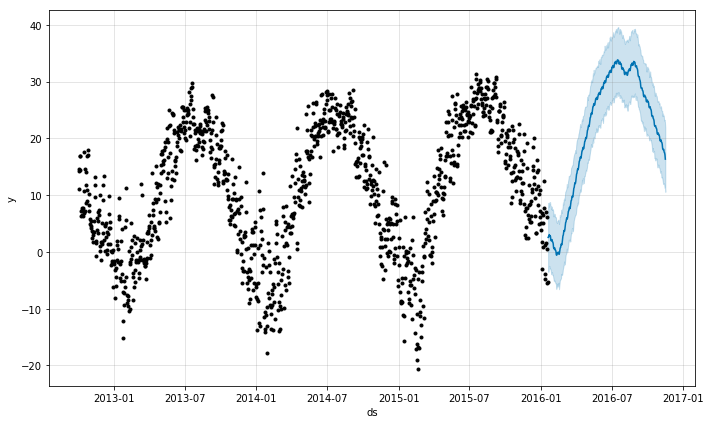

In [31]:
fig1 = model.plot(forecast)

In [32]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-20,16.833916,-3.503781,8.599627,16.833916,16.833916,-14.273049,-14.273049,-14.273049,-0.328717,-0.328717,-0.328717,-13.944333,-13.944333,-13.944333,0.0,0.0,0.0,2.560867
1,2016-01-21,16.850603,-3.509693,7.902561,16.850603,16.850603,-14.297465,-14.297465,-14.297465,-0.323908,-0.323908,-0.323908,-13.973557,-13.973557,-13.973557,0.0,0.0,0.0,2.553138
2,2016-01-22,16.867290,-2.503460,8.721796,16.867290,16.867290,-14.062992,-14.062992,-14.062992,-0.045530,-0.045530,-0.045530,-14.017462,-14.017462,-14.017462,0.0,0.0,0.0,2.804298
3,2016-01-23,16.883977,-2.442834,8.655866,16.883977,16.883977,-13.833420,-13.833420,-13.833420,0.245195,0.245195,0.245195,-14.078616,-14.078616,-14.078616,0.0,0.0,0.0,3.050557
4,2016-01-24,16.900664,-2.912240,8.386688,16.900664,16.900664,-14.096575,-14.096575,-14.096575,0.062423,0.062423,0.062423,-14.158998,-14.158998,-14.158998,0.0,0.0,0.0,2.804089


In [43]:
data3 = data2b.merge(forecast)[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]
data3['diff'] = abs(data3['y'] - data3['yhat'])
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 6 columns):
ds            302 non-null datetime64[ns]
y             302 non-null float64
yhat          302 non-null float64
yhat_lower    302 non-null float64
yhat_upper    302 non-null float64
diff          302 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 16.5 KB


,ds,y,yhat,yhat_lower,yhat_upper,diff
0,2016-01-20,-2.969248,2.560867,-3.503781,8.599627,5.530114
1,2016-01-21,-0.811279,2.553138,-3.509693,7.902561,3.364417
2,2016-01-22,1.663535,2.804298,-2.503460,8.721796,1.140763
3,2016-01-23,1.911159,3.050557,-2.442834,8.655866,1.139398
4,2016-01-24,1.528472,2.804089,-2.912240,8.386688,1.275616


In [44]:
data3.describe()

,y,yhat,yhat_lower,yhat_upper,diff
count,302.000000,302.000000,302.000000,302.000000,302.000000
mean,19.796033,21.321146,15.583419,27.025157,3.973556
std,10.014541,10.979939,10.973321,10.965209,3.004456
min,-8.033194,-0.585093,-6.574477,4.947979,0.030189
25%,11.977767,14.388130,8.231798,19.964063,1.515959
50%,21.142966,24.934836,19.207435,30.652589,3.376671
75%,28.415473,31.122330,25.360291,36.724260,5.804102
max,35.738109,33.807050,28.143988,39.617815,16.906823


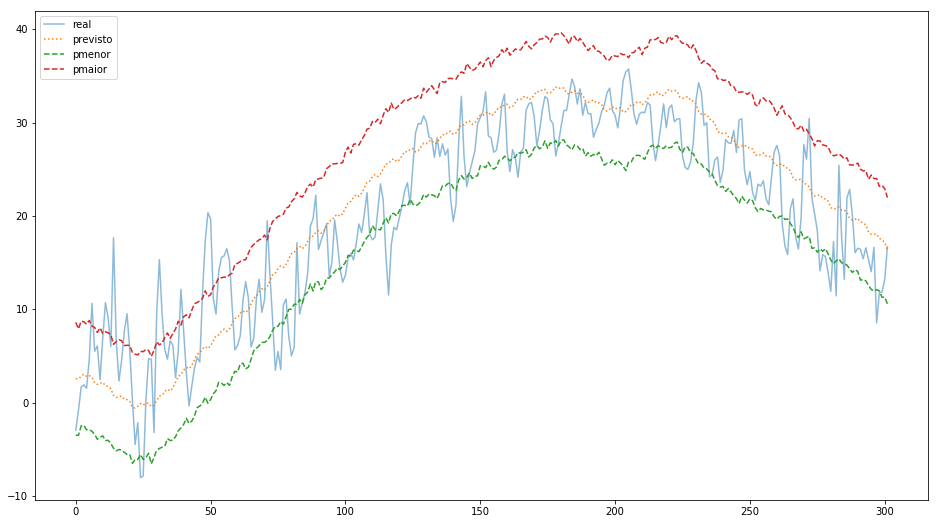

In [48]:
plt.figure(figsize=(16, 9))

data3['y'].plot(alpha=0.5, style='-')
data3['yhat'].plot(style=':')
data3['yhat_lower'].plot(style='--')
data3['yhat_upper'].plot(style='--')

plt.legend(['real', 'previsto', 'pmenor', 'pmaior'], loc='upper left')

In [52]:
def rmsle(y_pred, y_test): 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1 + y_pred) - np.log(1 + y_test)) ** 2))

In [53]:
rmsle(data3.yhat + 273.15, data3.y + 273.15)

0.017153733473520557